In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib as mpl
from glob import glob
from tqdm.notebook import tqdm
from sklearn.preprocessing import MinMaxScaler
import re
mpl.rcParams['font.size'] = 14

In [4]:
folder = r'../data\4-4-2024/'
files = glob(folder + '230K_energy_scan_pol*')
files

['../data\\4-4-2024\\230k_energy_scan_pol0_0.h5',
 '../data\\4-4-2024\\230k_energy_scan_pol1_0.h5',
 '../data\\4-4-2024\\230k_energy_scan_pol2_0.h5',
 '../data\\4-4-2024\\230k_energy_scan_pol-1_0.h5']

In [32]:
roi = np.s_[150:1000, 1100:1900]

scaler = MinMaxScaler()
for file in tqdm(files):
    pol = re.findall('-?\d+\.?\d*', file)[-3]
    if pol[0] == '-':
        pol = 'n1'
    with h5py.File(file, 'r') as f:
        globals()['pol_'+ pol] = f['entry']['data']['data'][(..., *roi)]

    globals()['p'+ pol] = globals()['pol_'+ pol].sum(axis=(1,2))

    scaler.fit(globals()['p'+ pol].reshape(-1, 1))
    globals()['sp'+ pol] = np.squeeze(scaler.transform(globals()['p'+ pol].reshape(-1, 1)))

  0%|          | 0/4 [00:00<?, ?it/s]

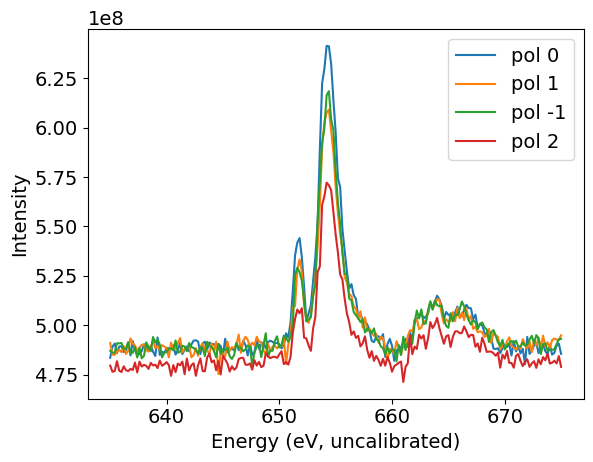

In [33]:
energy = np.linspace(635, 675, len(pol_0))

plt.figure()
plt.plot(energy, p0, label='pol 0')
plt.plot(energy, p1, label='pol 1')
plt.plot(energy, pn1, label='pol -1')
plt.plot(energy, p2, label='pol 2')
plt.xlabel('Energy (eV, uncalibrated)')
plt.ylabel('Intensity')
plt.legend()
plt.show()

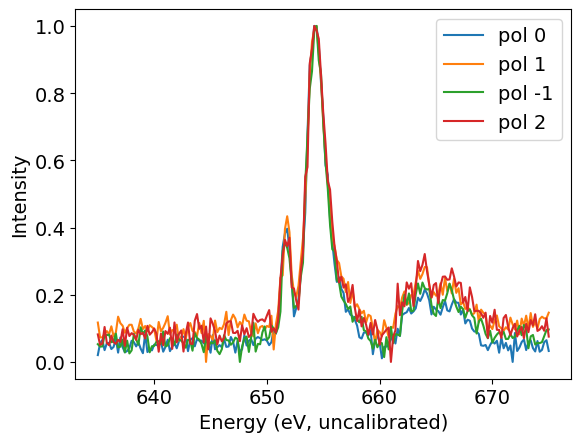

In [34]:
plt.figure()
plt.plot(energy, sp0, label='pol 0')
plt.plot(energy, sp1, label='pol 1')
plt.plot(energy, spn1, label='pol -1')
plt.plot(energy, sp2, label='pol 2')
plt.xlabel('Energy (eV, uncalibrated)')
plt.ylabel('Intensity')
plt.legend()
plt.show()

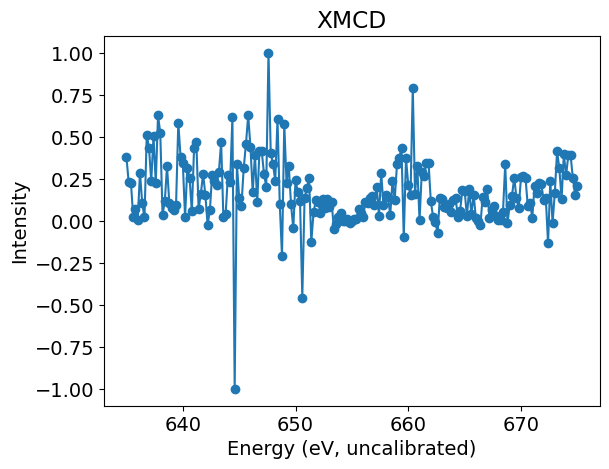

In [36]:
intensity =  (sp1 - spn1) / (sp1 + spn1)

plt.figure()
plt.plot(energy, intensity, '-o')
plt.title('XMCD')
plt.xlabel('Energy (eV, uncalibrated)')
plt.ylabel('Intensity')
plt.show()

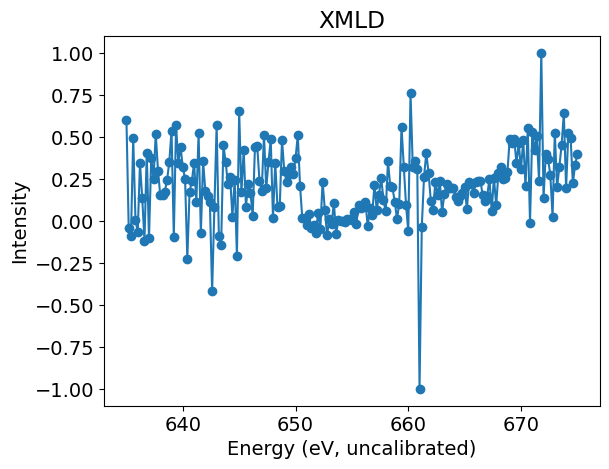

In [38]:
intensity =  (sp2 - sp0) / (sp2 + sp0)

plt.figure()
plt.plot(energy, intensity, '-o')
plt.title('XMLD')
plt.xlabel('Energy (eV, uncalibrated)')
plt.ylabel('Intensity')
plt.show()